### Glue Spark Notebook Run From Local 
- haimtran May 15, 2023

In [4]:
%help


# Available Magic Commands

## Sessions Magic

----
    %help                             Return a list of descriptions and input types for all magic commands. 
    %profile            String        Specify a profile in your aws configuration to use as the credentials provider.
    %region             String        Specify the AWS region in which to initialize a session. 
                                      Default from ~/.aws/config on Linux or macOS, 
                                      or C:\Users\ USERNAME \.aws\config" on Windows.
    %idle_timeout       Int           The number of minutes of inactivity after which a session will timeout. 
                                      Default: 2880 minutes (48 hours).
    %session_id_prefix  String        Define a String that will precede all session IDs in the format 
                                      [session_id_prefix]-[session_id]. If a session ID is not provided,
                                      a random UUID will be generated.
    %status                           Returns the status of the current Glue session including its duration, 
                                      configuration and executing user / role.
    %session_id                       Returns the session ID for the running session. 
    %list_sessions                    Lists all currently running sessions by ID.
    %stop_session                     Stops the current session.
    %glue_version       String        The version of Glue to be used by this session. 
                                      Currently, the only valid options are 2.0 and 3.0. 
                                      Default: 2.0.
----

## Selecting Job Types

----
    %streaming          String        Sets the session type to Glue Streaming.
    %etl                String        Sets the session type to Glue ETL.
    %glue_ray           String        Sets the session type to Glue Ray.
----

## Glue Config Magic 
*(common across all job types)*

----

    %%configure         Dictionary    A json-formatted dictionary consisting of all configuration parameters for 
                                      a session. Each parameter can be specified here or through individual magics.
    %iam_role           String        Specify an IAM role ARN to execute your session with.
                                      Default from ~/.aws/config on Linux or macOS, 
                                      or C:\Users\%USERNAME%\.aws\config` on Windows.
    %number_of_workers  int           The number of workers of a defined worker_type that are allocated 
                                      when a session runs.
                                      Default: 5.
    %additional_python_modules  List  Comma separated list of additional Python modules to include in your cluster 
                                      (can be from Pypi or S3).
----

                                      
## Magic for Spark Jobs (ETL & Streaming)

----
    %worker_type        String        Set the type of instances the session will use as workers. 
                                      ETL and Streaming support G.1X and G.2X. 
                                      Default: G.1X.
    %connections        List          Specify a comma separated list of connections to use in the session.
    %extra_py_files     List          Comma separated list of additional Python files From S3.
    %extra_jars         List          Comma separated list of additional Jars to include in the cluster.
    %spark_conf         String        Specify custom spark configurations for your session. 
                                      E.g. %spark_conf spark.serializer=org.apache.spark.serializer.KryoSerializer
----
                                      
## Magic for Ray Job

----
    %min_workers        Int           The minimum number of workers that are allocated to a Ray job. 
                                      Default: 1.
    %object_memory_head Int           The percentage of free memory on the instance head node after a warm start. 
                                      Minimum: 0. Maximum: 100.
    %object_memory_worker Int         The percentage of free memory on the instance worker nodes after a warm start. 
                                      Minimum: 0. Maximum: 100.
----

## Action Magic

----

    %%sql               String        Run SQL code. All lines after the initial %%sql magic will be passed
                                      as part of the SQL code.  
----



### Configuration for Glue Session 

In [22]:
%iam_role arn:aws:iam::212776191100:role/RoleForGlueNotebook
%additional_python_modules matplotlib, numpy, pandas 
%idle_timeout 15 
%glue_version 3.0 
%number_of_workers 5
# %region ap-southeast-1

You are already connected to a glueetl session 14f8046f-86d3-4cec-8e34-f15cce1a26fd.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Current iam_role is arn:aws:iam::212776191100:role/RoleForGlueNotebook
iam_role has been set to arn:aws:iam::212776191100:role/RoleForGlueNotebook.


You are already connected to a glueetl session 14f8046f-86d3-4cec-8e34-f15cce1a26fd.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Additional python modules to be included:
matplotlib
numpy
pandas


You are already connected to a glueetl session 14f8046f-86d3-4cec-8e34-f15cce1a26fd.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Current idle_timeout is 15 minutes.
idle_timeout has been set to 15 minutes.


You are already connected to a glueetl session 14f8046f-86d3-4cec-8e34-f15cce1a26fd.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Setting Glue version to: 3.0


You are already connected to a glueetl session 14f8046f-86d3-4cec-8e34-f15cce1a26fd.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Previous number of workers: 5
Setting new number of workers to: 5


### Create GlueConetxt and Spark Session 

In [14]:
from awsglue.context import GlueContext
from pyspark.context import SparkContext

In [15]:
sc = SparkContext.getOrCreate()
glueContext = GlueContext(sc)

### Spark Session and Read From S3 

In [16]:
spark = glueContext.spark_session

In [5]:
df = spark.read.parquet("s3://amazon-reviews-pds/parquet/product_category=Apparel/part-00000-495c48e6-96d6-4650-aa65-3c36a3516ddd.c000.snappy.parquet")

In [6]:
df.show(10)

+-----------+-----------+--------------+----------+--------------+--------------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+----+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|year|
+-----------+-----------+--------------+----------+--------------+--------------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+----+
|         US|   51114360|R2O1ZWACRT6PGH|B00004U3M4|     988649596|Adult Robin Costu...|          1|            9|         17|   N|                Y|   Not as advertised|This is an adult ...| 2001-10-10|2001|
|         US|   17052567|R26I9SLC2PZTW7|B00WGDJJM4|     973297679|LookbookStore Wom...|          5|            2|          2|   N|                Y|Cute and Sophisti...

### Create Spark Session 

In [7]:
from pyspark.sql import SparkSession
test = SparkSession.builder.appName("Test").enableHiveSupport().getOrCreate()

### Read from S3 into DataFrame

In [19]:
output = test.read.parquet("s3://amazon-reviews-pds/parquet/product_category=Apparel/part-00000-495c48e6-96d6-4650-aa65-3c36a3516ddd.c000.snappy.parquet")

In [20]:
output.show(10)

+-----------+-----------+--------------+----------+--------------+--------------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+----+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|year|
+-----------+-----------+--------------+----------+--------------+--------------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+----+
|         US|   51114360|R2O1ZWACRT6PGH|B00004U3M4|     988649596|Adult Robin Costu...|          1|            9|         17|   N|                Y|   Not as advertised|This is an adult ...| 2001-10-10|2001|
|         US|   17052567|R26I9SLC2PZTW7|B00WGDJJM4|     973297679|LookbookStore Wom...|          5|            2|          2|   N|                Y|Cute and Sophisti...

### Read From Data Catalog Table  

In [23]:
df2 = glueContext.create_dynamic_frame.from_catalog(database="default", table_name="amazon_reviews_parquet_table")

In [12]:
df2.show(10)

{"marketplace": "US", "customer_id": "17050420", "review_id": "R3QP7FJW6GAB3M", "product_id": "B007T0CIVS", "product_parent": "224029078", "product_title": "Preethi Eco Twin Jar Mixer Grinder, 550-Watt", "star_rating": 5, "helpful_votes": 3, "total_votes": 4, "vine": "N", "verified_purchase": "Y", "review_headline": "Finally something I can use", "review_body": "I always believed that the American blenders went toe to toe with the Indian ones, at least the affordable ones. I was getting tired of the blenders that only seemed to work when water was added or spice mixers that just tossed stuff around without actually grinding anything.<br /><br />Finally here's something that is pretty basic by Indian standards but so very effective. It comes with 2 jar and 4 lids. there are 2 lids for each jar. One adds a lot of room and the other one reduces it. I use the Large lid when I'm blending something like Dosa batter and the smaller lid for chutneys.<br /><br />There's also one extra blade (am

### Plot With Glue Session 

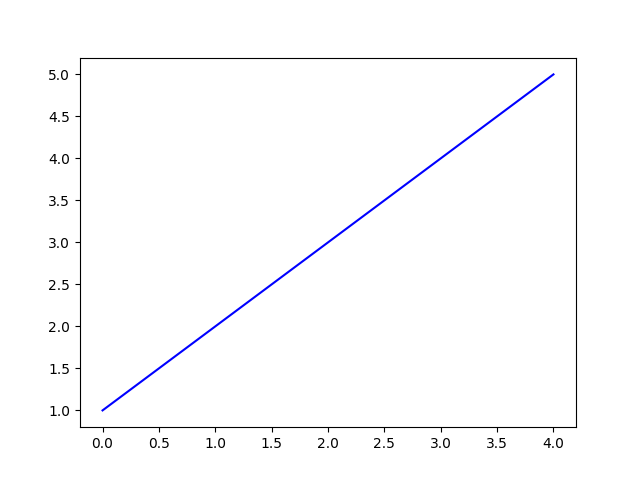

In [18]:
import matplotlib.pyplot as plt
fig,axe = plt.subplots(1,1)
axe.plot([1,2,3,4,5],'b')
%matplot plt